In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn.objects as so
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [13]:
data = pd.read_csv("results.csv")
data.head(8)

,Dataset,model,attack,acc,drop_ratio
0,Cora,GCN,clean,0.7084,0.0000
1,Cora,GCN,random,0.6930,0.0217
2,Cora,GCN,GRBCD,0.5166,0.2708
3,Cora,GCN,PRBCD,0.6045,0.1467
4,CiteSeer,GCN,clean,0.9333,0.0000
5,CiteSeer,GCN,random,0.9108,0.0241
6,CiteSeer,GCN,GRBCD,0.8983,0.0375
7,CiteSeer,GCN,PRBCD,0.8174,0.1242


In [14]:
data['keep_ratio'] = 1 - data['drop_ratio']
data = data[data['attack']!='clean']
data.head(8)

,Dataset,model,attack,acc,drop_ratio,keep_ratio
1,Cora,GCN,random,0.6930,0.0217,0.9783
2,Cora,GCN,GRBCD,0.5166,0.2708,0.7292
3,Cora,GCN,PRBCD,0.6045,0.1467,0.8533
5,CiteSeer,GCN,random,0.9108,0.0241,0.9759
6,CiteSeer,GCN,GRBCD,0.8983,0.0375,0.9625
7,CiteSeer,GCN,PRBCD,0.8174,0.1242,0.8758
9,PubMed,GCN,random,0.8543,0.0281,0.9719
10,PubMed,GCN,GRBCD,0.7102,0.1920,0.8080


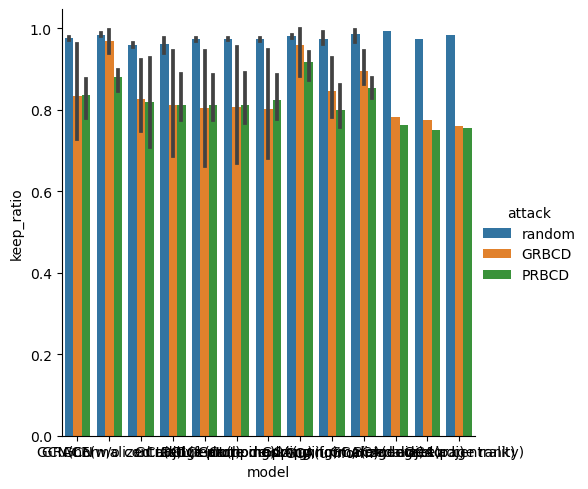

In [4]:
sns.catplot(data=data, x="model", y="keep_ratio", hue="attack", kind="bar")

In [ ]:
# (
#     so.Plot(data, x="model", y="keep_ratio", color="attack")
#     .add(so.Bar(), so.Agg())
# )

In [ ]:
# sns.catplot(data=data[data['attack']=='GRBCD'], x="model", y="keep_ratio", hue="attack", kind="point")

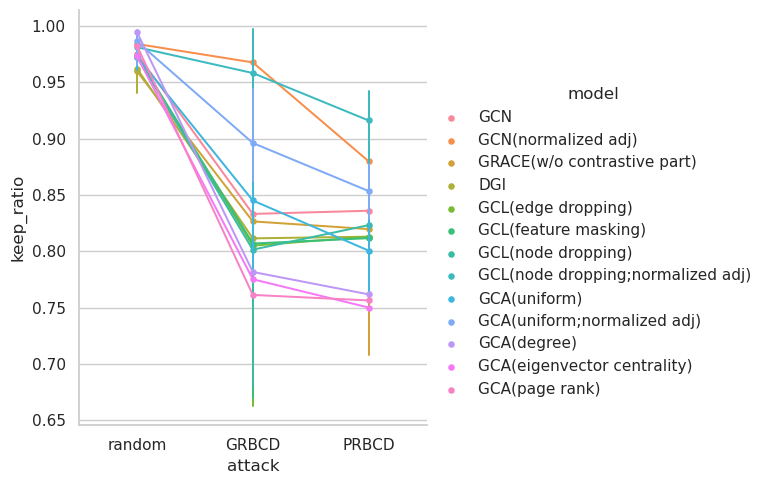

In [5]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
sns.catplot(data=data, x="attack", y="keep_ratio", hue="model", kind="point")

In [15]:
obs1 = data[data['model'].str.contains('GCL')]
obs1 = obs1[~data['model'].str.contains('adj')]
obs1 = obs1[data['Dataset'].str.contains('Cora')]
obs1

/tmp/ipykernel_1710317/3301376520.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs1 = obs1[~data['model'].str.contains('adj')]
/tmp/ipykernel_1710317/3301376520.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs1 = obs1[data['Dataset'].str.contains('Cora')]


,Dataset,model,attack,acc,drop_ratio,keep_ratio
49,Cora,GCL(edge dropping),random,0.6179,0.0312,0.9688
50,Cora,GCL(edge dropping),GRBCD,0.4224,0.3377,0.6623
51,Cora,GCL(edge dropping),PRBCD,0.4940,0.2255,0.7745
61,Cora,GCL(feature masking),random,0.6163,0.0294,0.9706
62,Cora,GCL(feature masking),GRBCD,0.4250,0.3307,0.6693
63,Cora,GCL(feature masking),PRBCD,0.4871,0.2329,0.7671
73,Cora,GCL(node dropping),random,0.6148,0.0310,0.9690
74,Cora,GCL(node dropping),GRBCD,0.4325,0.3184,0.6816
75,Cora,GCL(node dropping),PRBCD,0.4939,0.2216,0.7784


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


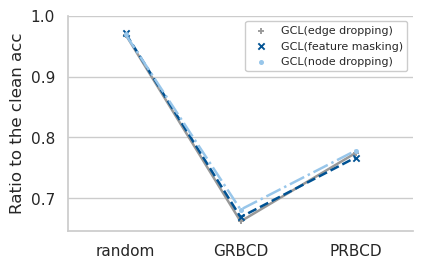

In [5]:
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
sns.set(style="whitegrid", rc={'lines.linewidth': 1, 'lines.markersize':10})
# sns.color_palette("Blues", as_cmap=True)
# mpl.rcParams['lines.markersize']=100
g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','0'], linestyles=['-','--','-.'], height=3, aspect=1.5, legend=False)
# g.collections[0].set_sizes([100])

# 获取当前的图表对象
ax = g.ax

# 移动图例到右上角空白处
legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
frame = legend.get_frame()
frame.set_linewidth(1)  # 设置图例框的线宽


# 显示图表
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
plt.ylim(None, 1)
plt.ylabel("Ratio to the clean acc")
plt.xlabel("")
plt.show()

# 设置保存的文件路径和名称
output_file = "obs1.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

In [16]:
obs11 = data[data['model'].str.contains('GCA')]
obs11 = obs11[~data['model'].str.contains('adj')]
obs11 = obs11[data['Dataset'].str.contains('Cora')]
obs11

/tmp/ipykernel_1710317/305437174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs11 = obs11[~data['model'].str.contains('adj')]
/tmp/ipykernel_1710317/305437174.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs11 = obs11[data['Dataset'].str.contains('Cora')]


,Dataset,model,attack,acc,drop_ratio,keep_ratio
97,Cora,GCA(uniform),random,0.5771,0.0101,0.9899
98,Cora,GCA(uniform),GRBCD,0.3691,0.2181,0.7819
99,Cora,GCA(uniform),PRBCD,0.3457,0.2415,0.7585
121,Cora,GCA(degree),random,0.5859,0.0053,0.9947
122,Cora,GCA(degree),GRBCD,0.3729,0.2183,0.7817
123,Cora,GCA(degree),PRBCD,0.3530,0.2382,0.7618
125,Cora,GCA(eigenvector centrality),random,0.5703,0.0266,0.9734
126,Cora,GCA(eigenvector centrality),GRBCD,0.3721,0.2248,0.7752
127,Cora,GCA(eigenvector centrality),PRBCD,0.3470,0.2499,0.7501
129,Cora,GCA(page rank),random,0.5698,0.0174,0.9826


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


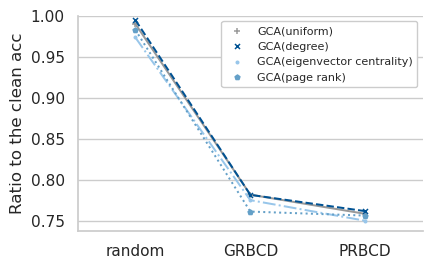

In [17]:
g = sns.catplot(data=obs11, x="attack", y="keep_ratio", hue="model", kind="point", palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1.5, legend=False)

# 获取当前的图表对象
ax = g.ax

# 移动图例到右上角空白处
# ax.legend(loc='upper right')
legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
frame = legend.get_frame()
frame.set_linewidth(1)  # 设置图例框的线宽
# frame.set_edgecolor('red')  # 设置图例框的边框颜色

# 显示图表
plt.ylabel("Ratio to the clean acc")
plt.xlabel("")
plt.ylim(None, 1)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs11.png"

# 保存图表为高清格式
# g.figure.suptitle("GCA with augmentations", fontsize=18)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
No artists with labels found to put in legend.  

IndexError: list index out of range

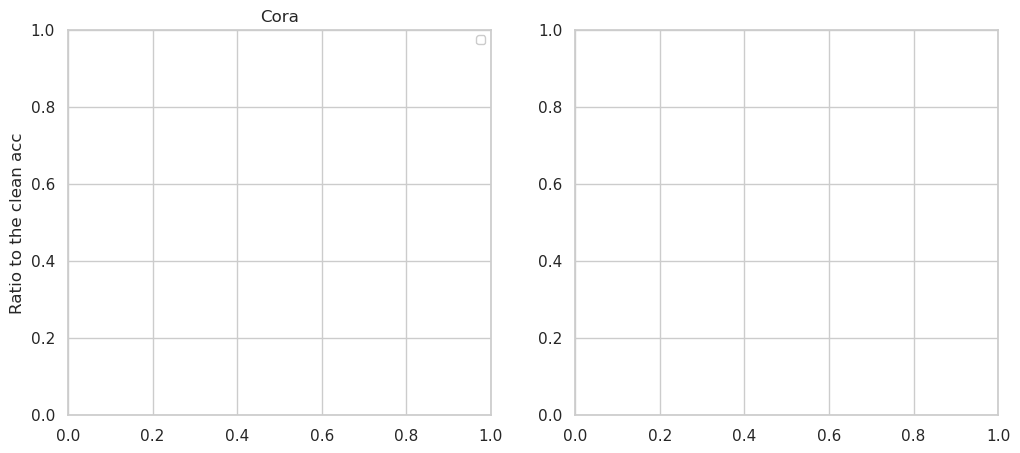

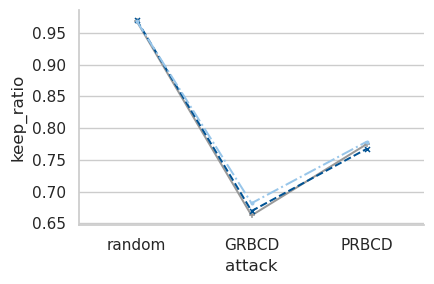

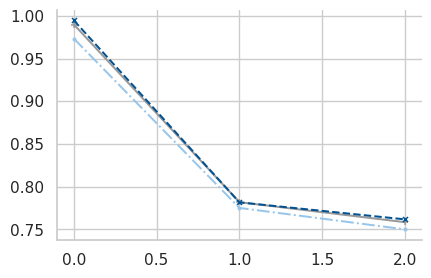

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.catplot(data=obs1, ax=axes[0], x="attack", y="keep_ratio", hue="model", kind="point", palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','0'], linestyles=['-','--','-.'], height=3, aspect=1.5, legend=False)
axes[0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[0].set_xlabel("")  # 设置 y 轴的名称
axes[0].set_title("Cora")  # 设置 y 轴的名称
legend = axes[0].legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

sns.catplot(data=obs11, ax=axes[1], x="attack", y="keep_ratio", hue="model", kind="point", palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','0'], linestyles=['-','--','-.'], height=3, aspect=1.5, legend=False)
axes[1].set_ylim(None, 1)  # 设置 y 轴的范围
axes[1].set_ylabel("")  # 设置 y 轴的名称
axes[1].set_xlabel("")  # 设置 y 轴的名称
axes[1].set_title("Cora")  # 设置 y 轴的名称
axes[1].legend([],[],frameon=False)


# patch1 = mlines.Line2D([], [], color='#999999', marker='+', linestyle='None',
#                           markersize=5, label='InfoMax')
# patch2 = mlines.Line2D([], [], color='#005293', marker='x', linestyle='None',
#                           markersize=5, label='GCL')
# patch3 = mlines.Line2D([], [], color='#98c6ea', marker='.', linestyle='None',
#                           markersize=5, label='AD-GCL')
# patch4 = mlines.Line2D([], [], color='#98c6ea', marker='p', linestyle='None',
#                           markersize=5, label='GIN')
# 创建图例
# axes[1, 1].legend(handles=[patch1, patch2, patch3, patch4], loc='center')
# axes[1, 1].axis('off')

plt.ylabel("Ratio to the clean acc")
plt.tight_layout()

# 显示图表
plt.show()

# 设置保存的文件路径和名称
output_file = "obs1_all.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1600, bbox_inches='tight')

In [16]:
obs2 = data[data['model'].isin(['GCN','DGI','GCL(edge dropping)'])]
# obs2 = obs2[~data['model'].str.contains('adj')]
obs2

,Dataset,model,attack,acc,drop_ratio,keep_ratio
1,Cora,GCN,random,0.6930,0.0217,0.9783
2,Cora,GCN,GRBCD,0.5166,0.2708,0.7292
3,Cora,GCN,PRBCD,0.6045,0.1467,0.8533
5,CiteSeer,GCN,random,0.9108,0.0241,0.9759
6,CiteSeer,GCN,GRBCD,0.8983,0.0375,0.9625
7,CiteSeer,GCN,PRBCD,0.8174,0.1242,0.8758
9,PubMed,GCN,random,0.8543,0.0281,0.9719
10,PubMed,GCN,GRBCD,0.7102,0.1920,0.8080
11,PubMed,GCN,PRBCD,0.6848,0.2209,0.7791
37,Cora,DGI,random,0.6145,0.0295,0.9705


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

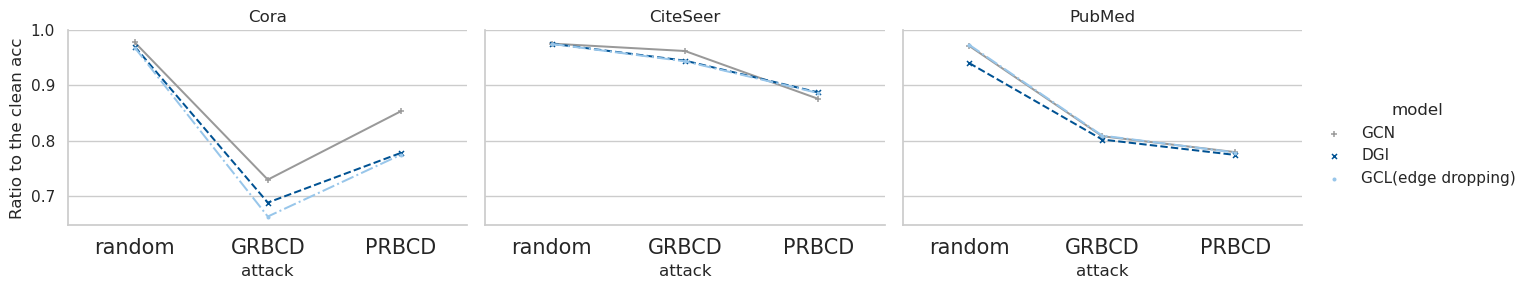

In [22]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
# g = sns.catplot(data=obs2, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
g = sns.catplot(data=obs2, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset',palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1.5, legend=True)


# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽
# legend = g.legend
# for text in legend.get_texts():
#     text.set_fontsize(15)
# plt.setp(g.legend.get_texts(), fontsize='22') # for legend text

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#     ax.set_yticklabels("Ratio to the clean acc")
g.set_titles("{col_name}")
g.set_ylabels("Ratio to the clean acc")
plt.ylim(None, 1)
plt.ylabel("Ratio to the clean acc")
plt.show()

# 设置保存的文件路径和名称
output_file = "obs2.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1600, bbox_inches='tight')

/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

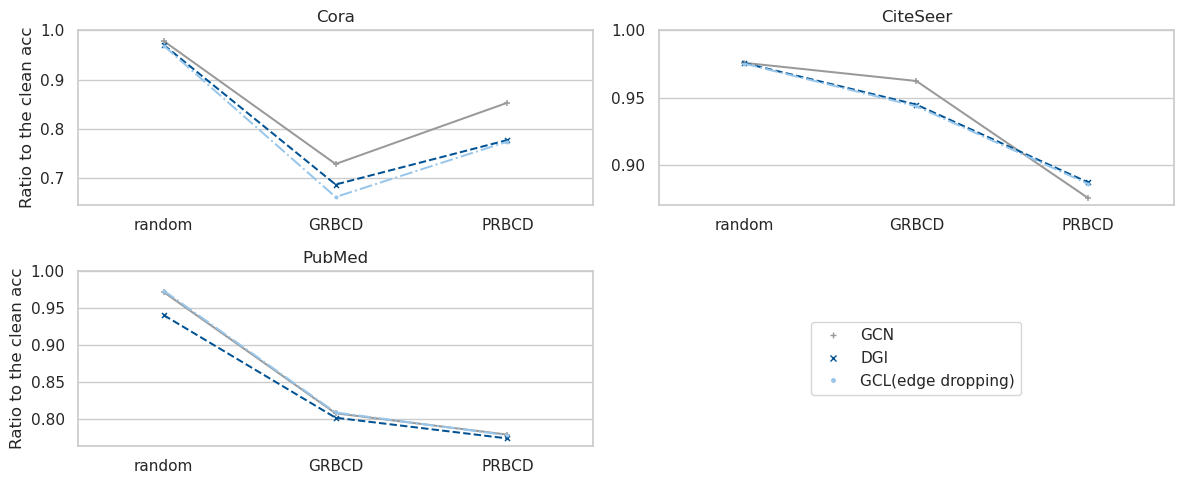

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
sns.pointplot(data=obs2[obs2['Dataset']=='Cora'], ax=axes[0, 0], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[0, 0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0, 0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[0, 0].set_xlabel("")  # 设置 y 轴的名称
axes[0, 0].set_title("Cora")  # 设置 y 轴的名称
axes[0, 0].legend([],[],frameon=False)

g = sns.pointplot(data=obs2[obs2['Dataset']=='CiteSeer'], ax=axes[0, 1], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[0, 1].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0, 1].set_ylabel("")  # 设置 y 轴的名称
axes[0, 1].set_xlabel("")  # 设置 y 轴的名称
axes[0, 1].set_title("CiteSeer")  # 设置 y 轴的名称
axes[0, 1].legend([],[],frameon=False)

sns.pointplot(data=obs2[obs2['Dataset']=='PubMed'], ax=axes[1, 0], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[1, 0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[1, 0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[1, 0].set_title("PubMed")  # 设置 y 轴的名称
axes[1, 0].set_xlabel("")  # 设置 y 轴的名称
# axes[1, 0].legend(loc='center right', bbox_to_anchor=(1.3, 0.5), frameon=False)
axes[1, 0].legend([],[],frameon=False)


patch1 = mlines.Line2D([], [], color='#999999', marker='+', linestyle='None',
                          markersize=5, label='GCN')
patch2 = mlines.Line2D([], [], color='#005293', marker='x', linestyle='None',
                          markersize=5, label='DGI')
patch3 = mlines.Line2D([], [], color='#98c6ea', marker='.', linestyle='None',
                          markersize=5, label='GCL(edge dropping)')
# 创建图例
axes[1, 1].legend(handles=[patch1, patch2, patch3], loc='center')
axes[1, 1].axis('off')

plt.ylabel("Ratio to the clean acc")
plt.tight_layout()

# 显示图表
plt.show()

# 设置保存的文件路径和名称
output_file = "obs2_subplot.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1600, bbox_inches='tight')

In [23]:
obs22 = data[data['model'].isin(['GRACE(w/o contrastive part)','GCA(uniform)'])]
# obs2 = obs2[~data['model'].str.contains('adj')]
obs22

,Dataset,model,attack,acc,drop_ratio,keep_ratio
25,Cora,GRACE(w/o contrastive part),random,0.6176,0.0458,0.9542
26,Cora,GRACE(w/o contrastive part),GRBCD,0.4107,0.2527,0.7473
27,Cora,GRACE(w/o contrastive part),PRBCD,0.3711,0.2923,0.7077
29,CiteSeer,GRACE(w/o contrastive part),random,0.9267,0.0312,0.9688
30,CiteSeer,GRACE(w/o contrastive part),GRBCD,0.8807,0.0772,0.9228
31,CiteSeer,GRACE(w/o contrastive part),PRBCD,0.8846,0.0733,0.9267
33,PubMed,GRACE(w/o contrastive part),random,0.8397,0.0434,0.9566
34,PubMed,GRACE(w/o contrastive part),GRBCD,0.6928,0.1903,0.8097
35,PubMed,GRACE(w/o contrastive part),PRBCD,0.7080,0.1751,0.8249
97,Cora,GCA(uniform),random,0.5771,0.0101,0.9899


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

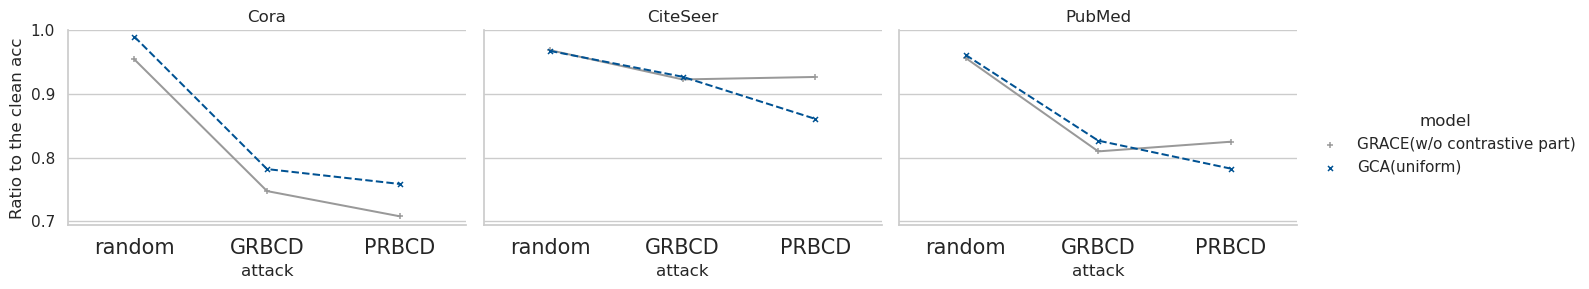

In [39]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
# g = sns.catplot(data=obs22, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
g = sns.catplot(data=obs22, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset',palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1.5, legend=True)


# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
g.set_titles("{col_name}")
plt.ylim(None, 1)
g.set_ylabels("Ratio to the clean acc")
plt.show()

# 设置保存的文件路径和名称
output_file = "obs22.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

In [26]:
obs3 = data[data['model'].isin(['GCN','GCN(normalized adj)'])]
# obs2 = obs2[~data['model'].str.contains('adj')]
# obs3 = obs3[data['Dataset'].str.contains('Cora')]
obs3

,Dataset,model,attack,acc,drop_ratio,keep_ratio
1,Cora,GCN,random,0.6930,0.0217,0.9783
2,Cora,GCN,GRBCD,0.5166,0.2708,0.7292
3,Cora,GCN,PRBCD,0.6045,0.1467,0.8533
5,CiteSeer,GCN,random,0.9108,0.0241,0.9759
6,CiteSeer,GCN,GRBCD,0.8983,0.0375,0.9625
7,CiteSeer,GCN,PRBCD,0.8174,0.1242,0.8758
9,PubMed,GCN,random,0.8543,0.0281,0.9719
10,PubMed,GCN,GRBCD,0.7102,0.1920,0.8080
11,PubMed,GCN,PRBCD,0.6848,0.2209,0.7791
13,Cora,GCN(normalized adj),random,0.7060,0.0119,0.9881


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

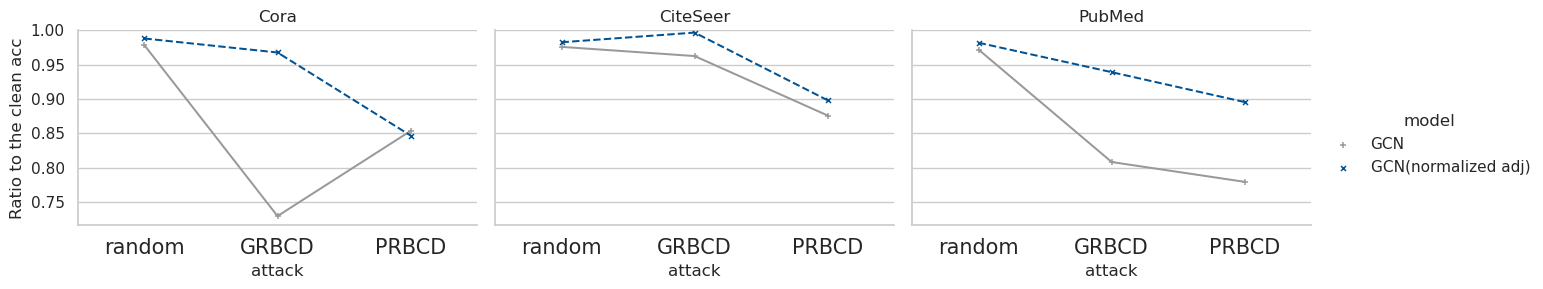

In [38]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
# g = sns.catplot(data=obs3, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
g = sns.catplot(data=obs3, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset',palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1.5, legend=True)


# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
g.set_titles("{col_name}")
plt.ylim(None, 1)
g.set_ylabels("Ratio to the clean acc")
plt.show()

# 设置保存的文件路径和名称
output_file = "obs3.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

In [28]:
# obs32 = data[data['model'].isin(['GCN','GCL(node dropping)','GCN(normalized adj)','GCL(node dropping;normalized adj)', 'GCA(uniform)', 'GCA(uniform;normalized adj)'])]
obs32 = data[data['model'].isin(['GCL(node dropping)','GCL(node dropping;normalized adj)'])]
obs32

,Dataset,model,attack,acc,drop_ratio,keep_ratio
73,Cora,GCL(node dropping),random,0.6148,0.0310,0.9690
74,Cora,GCL(node dropping),GRBCD,0.4325,0.3184,0.6816
75,Cora,GCL(node dropping),PRBCD,0.4939,0.2216,0.7784
77,CiteSeer,GCL(node dropping),random,0.8599,0.0245,0.9755
78,CiteSeer,GCL(node dropping),GRBCD,0.8355,0.0521,0.9479
79,CiteSeer,GCL(node dropping),PRBCD,0.7809,0.1142,0.8858
81,PubMed,GCL(node dropping),random,0.8523,0.0261,0.9739
82,PubMed,GCL(node dropping),GRBCD,0.7050,0.2250,0.7750
83,PubMed,GCL(node dropping),PRBCD,0.6783,0.1944,0.8056
85,Cora,GCL(node dropping;normalized adj),random,0.6048,0.0168,0.9832


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

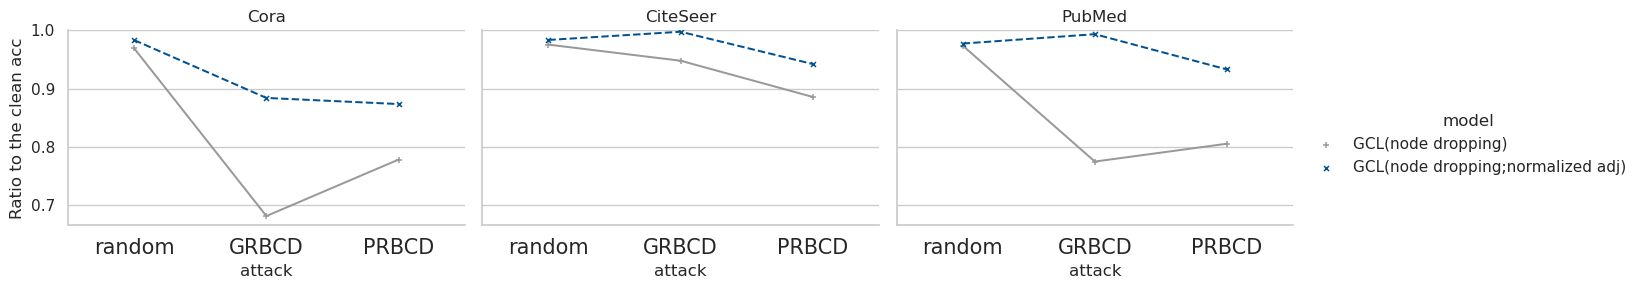

In [37]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
# g = sns.catplot(data=obs32, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
g = sns.catplot(data=obs32, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset',palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1.5, legend=True)


# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
g.set_titles("{col_name}")
plt.ylim(None, 1)
g.set_ylabels("Ratio to the clean acc")
plt.show()

# 设置保存的文件路径和名称
output_file = "obs32.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

In [30]:
# obs33 = data[data['model'].isin(['GCN','GCL(node dropping)','GCN(normalized adj)','GCL(node dropping;normalized adj)', 'GCA(uniform)', 'GCA(uniform;normalized adj)'])]
obs33 = data[data['model'].isin(['GCA(uniform)','GCA(uniform;normalized adj)'])]
obs33

,Dataset,model,attack,acc,drop_ratio,keep_ratio
97,Cora,GCA(uniform),random,0.5771,0.0101,0.9899
98,Cora,GCA(uniform),GRBCD,0.3691,0.2181,0.7819
99,Cora,GCA(uniform),PRBCD,0.3457,0.2415,0.7585
101,CiteSeer,GCA(uniform),random,0.8308,0.0324,0.9676
102,CiteSeer,GCA(uniform),GRBCD,0.7902,0.0730,0.9270
103,CiteSeer,GCA(uniform),PRBCD,0.7240,0.1392,0.8608
105,PubMed,GCA(uniform),random,0.8188,0.0387,0.9613
106,PubMed,GCA(uniform),GRBCD,0.6841,0.1734,0.8266
107,PubMed,GCA(uniform),PRBCD,0.6401,0.2174,0.7826
109,Cora,GCA(uniform;normalized adj),random,0.5811,0.0033,0.9967


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

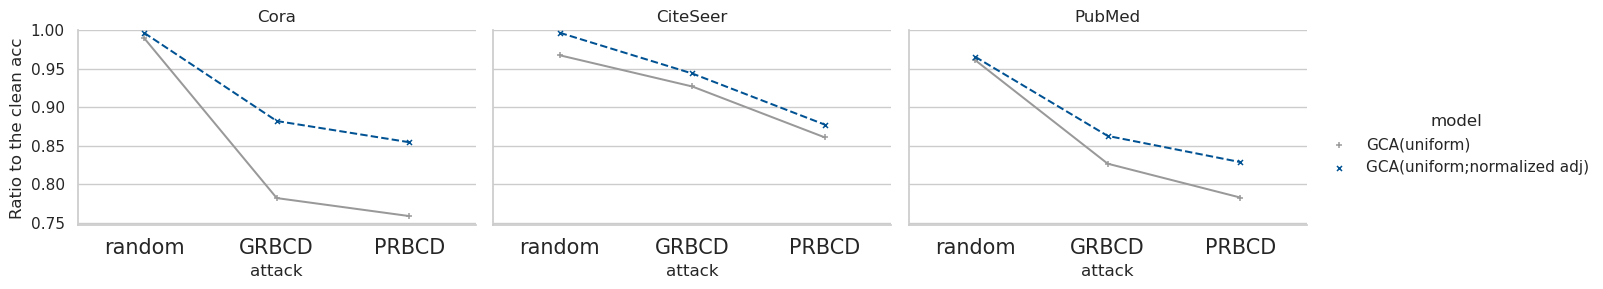

In [36]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
# g = sns.catplot(data=obs33, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
g = sns.catplot(data=obs33, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset',palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1.5, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
g.set_titles("{col_name}")
plt.ylim(None, 1)
g.set_ylabels("Ratio to the clean acc")
plt.show()

# 设置保存的文件路径和名称
output_file = "obs33.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

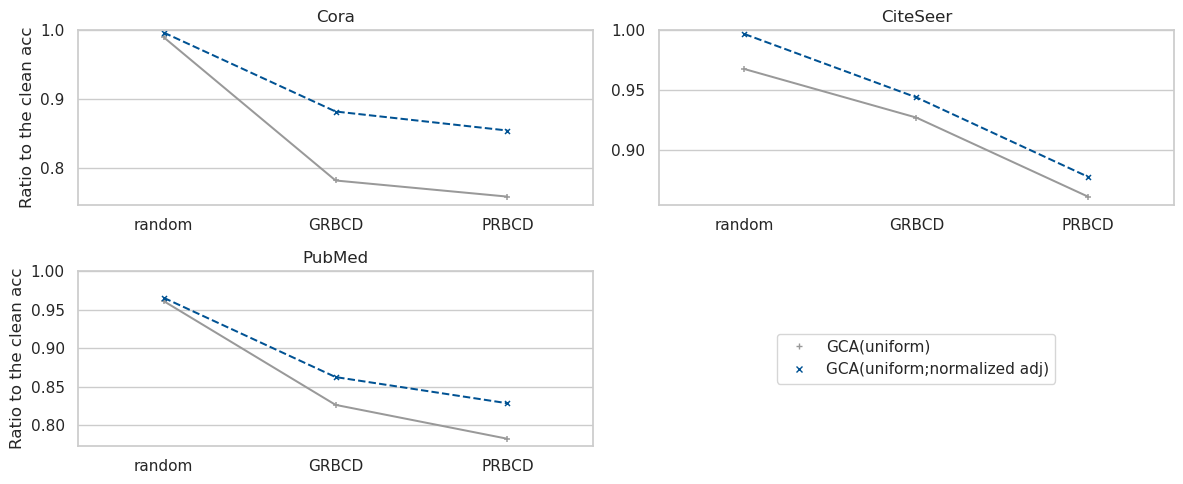

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
sns.pointplot(data=obs33[obs33['Dataset']=='Cora'], ax=axes[0, 0], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[0, 0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0, 0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[0, 0].set_xlabel("")  # 设置 y 轴的名称
axes[0, 0].set_title("Cora")  # 设置 y 轴的名称
axes[0, 0].legend([],[],frameon=False)

g = sns.pointplot(data=obs33[obs33['Dataset']=='CiteSeer'], ax=axes[0, 1], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[0, 1].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0, 1].set_ylabel("")  # 设置 y 轴的名称
axes[0, 1].set_xlabel("")  # 设置 y 轴的名称
axes[0, 1].set_title("CiteSeer")  # 设置 y 轴的名称
axes[0, 1].legend([],[],frameon=False)

sns.pointplot(data=obs33[obs33['Dataset']=='PubMed'], ax=axes[1, 0], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[1, 0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[1, 0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[1, 0].set_title("PubMed")  # 设置 y 轴的名称
axes[1, 0].set_xlabel("")  # 设置 y 轴的名称
# axes[1, 0].legend(loc='center right', bbox_to_anchor=(1.3, 0.5), frameon=False)
axes[1, 0].legend([],[],frameon=False)


patch1 = mlines.Line2D([], [], color='#999999', marker='+', linestyle='None',
                          markersize=5, label='GCA(uniform)')
patch2 = mlines.Line2D([], [], color='#005293', marker='x', linestyle='None',
                          markersize=5, label='GCA(uniform;normalized adj)')
# patch3 = mlines.Line2D([], [], color='#98c6ea', marker='.', linestyle='None',
#                           markersize=5, label='GCL(edge dropping)')
# 创建图例
axes[1, 1].legend(handles=[patch1, patch2], loc='center')
axes[1, 1].axis('off')

plt.ylabel("Ratio to the clean acc")
plt.tight_layout()

# 显示图表
plt.show()

# 设置保存的文件路径和名称
output_file = "obs33_subplot.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1600, bbox_inches='tight')

### Graph classification

In [5]:
data = pd.read_csv("graph.csv", sep='\t')
data['keep_ratio'] = 1 - data['drop_ratio']
data.head(8)

,Dataset,model,attack,drop_ratio,keep_ratio
0,PROTEINS,InfoMax,random,0.0430,0.9570
1,PROTEINS,InfoMax,PGD,0.0840,0.9160
2,PROTEINS,GCL,random,0.0878,0.9122
3,PROTEINS,GCL,PGD,0.1197,0.8803
4,PROTEINS,AD-GCL,random,0.0745,0.9255
5,PROTEINS,AD-GCL,PGD,0.1852,0.8148
6,PROTEINS,GIN,random,0.0955,0.9045
7,PROTEINS,GIN,PGD,0.0855,0.9145


In [6]:
# obs33 = data[data['model'].isin(['GCN','GCL(node dropping)','GCN(normalized adj)','GCL(node dropping;normalized adj)', 'GCA(uniform)', 'GCA(uniform;normalized adj)'])]
# graph1 = data[data['model'].isin(['GCA(uniform)','GCA(uniform;normalized adj)'])]
graph1 = data
graph1

,Dataset,model,attack,drop_ratio,keep_ratio
0,PROTEINS,InfoMax,random,0.0430,0.9570
1,PROTEINS,InfoMax,PGD,0.0840,0.9160
2,PROTEINS,GCL,random,0.0878,0.9122
3,PROTEINS,GCL,PGD,0.1197,0.8803
4,PROTEINS,AD-GCL,random,0.0745,0.9255
5,PROTEINS,AD-GCL,PGD,0.1852,0.8148
6,PROTEINS,GIN,random,0.0955,0.9045
7,PROTEINS,GIN,PGD,0.0855,0.9145
8,NCI1,InfoMax,random,0.1020,0.8980
9,NCI1,InfoMax,PGD,0.2420,0.7580


/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

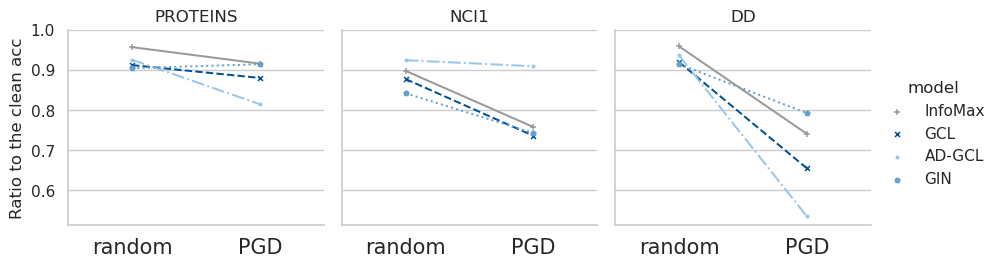

In [28]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
# g = sns.catplot(data=obs33, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
g = sns.catplot(data=graph1, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset',palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'], height=3, aspect=1, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
g.set_titles("{col_name}")
plt.ylim(None, 1)
g.set_ylabels("Ratio to the clean acc")
g.set_xlabels("")
plt.show()

# 设置保存的文件路径和名称
output_file = "graph1.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1800, bbox_inches='tight')

/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.3215686274509804, 0.5764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/nfs/homedirs/yzi/miniconda3/envs/lsml_new/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6, 0.6, 0.6)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the 

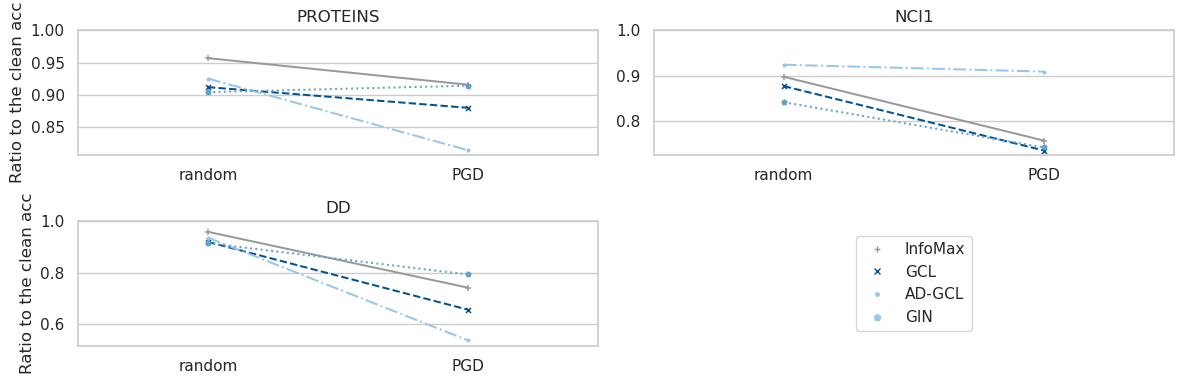

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
sns.pointplot(data=graph1[graph1['Dataset']=='PROTEINS'], ax=axes[0, 0], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[0, 0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0, 0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[0, 0].set_xlabel("")  # 设置 y 轴的名称
axes[0, 0].set_title("PROTEINS")  # 设置 y 轴的名称
axes[0, 0].legend([],[],frameon=False)

g = sns.pointplot(data=graph1[graph1['Dataset']=='NCI1'], ax=axes[0, 1], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[0, 1].set_ylim(None, 1)  # 设置 y 轴的范围
axes[0, 1].set_ylabel("")  # 设置 y 轴的名称
axes[0, 1].set_xlabel("")  # 设置 y 轴的名称
axes[0, 1].set_title("NCI1")  # 设置 y 轴的名称
axes[0, 1].legend([],[],frameon=False)

sns.pointplot(data=graph1[graph1['Dataset']=='DD'], ax=axes[1, 0], x="attack", y="keep_ratio", hue="model",palette=['#999999','#005293','#98c6ea','#64a0c8'], markers=['+','x','.','p'], linestyles=['-','--','-.',':'])
axes[1, 0].set_ylim(None, 1)  # 设置 y 轴的范围
axes[1, 0].set_ylabel("Ratio to the clean acc")  # 设置 y 轴的名称
axes[1, 0].set_title("DD")  # 设置 y 轴的名称
axes[1, 0].set_xlabel("")  # 设置 y 轴的名称
# axes[1, 0].legend(loc='center right', bbox_to_anchor=(1.3, 0.5), frameon=False)
axes[1, 0].legend([],[],frameon=False)


patch1 = mlines.Line2D([], [], color='#999999', marker='+', linestyle='None',
                          markersize=5, label='InfoMax')
patch2 = mlines.Line2D([], [], color='#005293', marker='x', linestyle='None',
                          markersize=5, label='GCL')
patch3 = mlines.Line2D([], [], color='#98c6ea', marker='.', linestyle='None',
                          markersize=5, label='AD-GCL')
patch4 = mlines.Line2D([], [], color='#98c6ea', marker='p', linestyle='None',
                          markersize=5, label='GIN')
# 创建图例
axes[1, 1].legend(handles=[patch1, patch2, patch3, patch4], loc='center')
axes[1, 1].axis('off')

plt.ylabel("Ratio to the clean acc")
plt.tight_layout()

# 显示图表
plt.show()

# 设置保存的文件路径和名称
output_file = "graph1_subplot_12_4.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=1000, bbox_inches='tight')